Data Creation

In [84]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [85]:
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [86]:
train_split = int(0.8*(len(X)))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train),len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [87]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

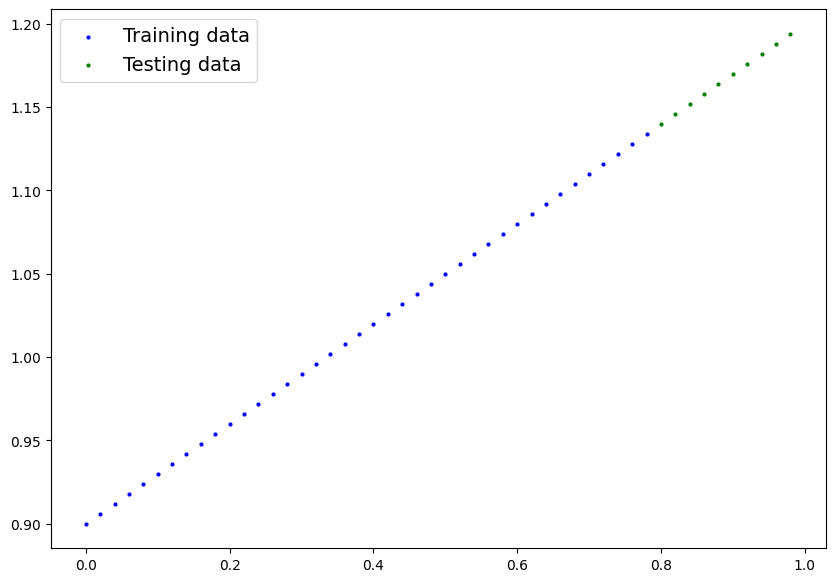

In [88]:
plot_predictions()

Building Model

In [89]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x : torch.Tensor):
    return self.linear_layer(x)


In [90]:
model = LinearRegression()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1193]])),
             ('linear_layer.bias', tensor([0.1182]))])

In [91]:
model.to(device="cuda")

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [92]:
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=model.parameters(), lr=0.01)

Training & Testing Loop

In [93]:
torch.manual_seed(4)

epochs = 300

#put data on device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train)

  optim.zero_grad()

  loss.backward()

  optim.step()

  #testing loop

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fn(test_pred, X_test)

    if epoch % 20 == 0:
      print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")


Epoch : 0 | Loss : 0.8522970080375671 | Test loss : 0.6521874666213989
Epoch : 20 | Loss : 0.6218769550323486 | Test loss : 0.38276734948158264
Epoch : 40 | Loss : 0.3914571702480316 | Test loss : 0.11334749311208725
Epoch : 60 | Loss : 0.1610374003648758 | Test loss : 0.15607216954231262
Epoch : 80 | Loss : 0.018940530717372894 | Test loss : 0.31972187757492065
Epoch : 100 | Loss : 0.01205039955675602 | Test loss : 0.3045508563518524
Epoch : 120 | Loss : 0.005176994483917952 | Test loss : 0.28800612688064575
Epoch : 140 | Loss : 0.007884430699050426 | Test loss : 0.27615681290626526
Epoch : 160 | Loss : 0.007884430699050426 | Test loss : 0.27615681290626526
Epoch : 180 | Loss : 0.007884430699050426 | Test loss : 0.27615681290626526
Epoch : 200 | Loss : 0.007884430699050426 | Test loss : 0.27615681290626526
Epoch : 220 | Loss : 0.007884430699050426 | Test loss : 0.27615681290626526
Epoch : 240 | Loss : 0.007884430699050426 | Test loss : 0.27615681290626526
Epoch : 260 | Loss : 0.007884

Predictions

In [94]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3095]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9042], device='cuda:0'))])

In [95]:
model.eval()

with torch.inference_mode():
  y_pred = model(X_test)

y_pred

tensor([[1.1518],
        [1.1580],
        [1.1642],
        [1.1703],
        [1.1765],
        [1.1827],
        [1.1889],
        [1.1951],
        [1.2013],
        [1.2075]], device='cuda:0')

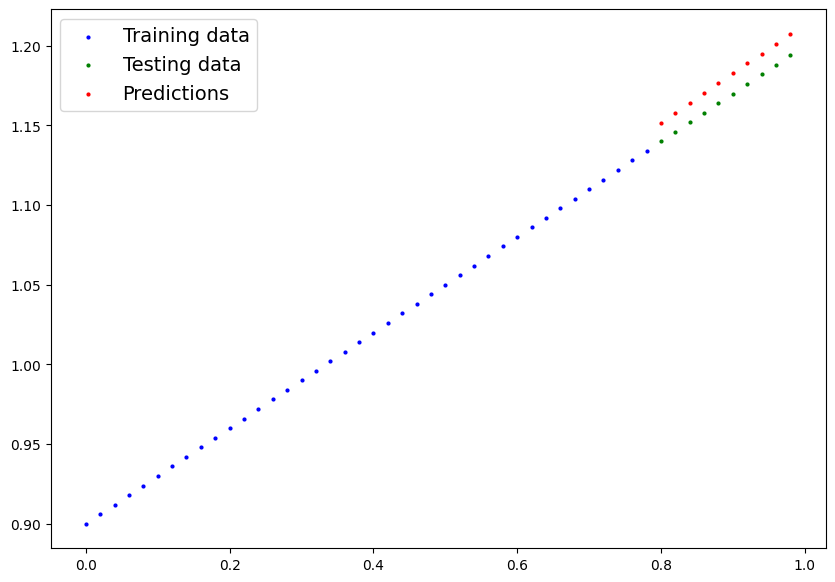

In [96]:
plot_predictions(predictions = y_pred.cpu())

Saving & Loading

In [97]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "Exercise_1"
model_save_path = model_path / model_name

torch.save(obj = model.state_dict(), f = model_save_path)

In [98]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(f = model_save_path))

loaded_model.to(device)

LinearRegression(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [99]:
loaded_model.eval()
with torch.inference_mode():
  loadedModel_preds = loaded_model(X_test)

loadedModel_preds

tensor([[1.1518],
        [1.1580],
        [1.1642],
        [1.1703],
        [1.1765],
        [1.1827],
        [1.1889],
        [1.1951],
        [1.2013],
        [1.2075]], device='cuda:0')

In [100]:
loadedModel_preds == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Great Success !